# Guía de trabajo N°1 #

## Procesamiento de datos/data mining ##


#  Ejercicio 1: Diagnóstico Python (operaciones básicas con arreglos) #

## a) Usando numpy, crear los siguientes arreglos de datos: ##
*   A =[números pares entre 2 y 103]
*   B =[números primos entre 1 y 55]  

## b) Crear un nuevo arreglo C = (2 ∗ A) + B e imprimir resultado. ##

## c) Crear un nuevo arreglo con 2 dimensiones cuya primera columna corresponda a la suma de los elementos de A y B, mientras que la segunda columna sea el resultado de la sustracción de los elementos de A y B. ##
### Imprima sus resultados a pantalla. ###

## d) Aplique una condición para generar un nuevo arreglo con los elementos de A mayores que 8 y donde en B sean mayores que 20.  ##

## Ejercicio 2: Lectura e inspección básica de datos




In [2]:
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 40.7 MB/s eta 0:00:00


# ----------------------------------------
# 📦 Parámetros comunes de GAIA DR3
# ----------------------------------------

# ID único de cada estrella
# source_id

# Coordenadas ecuatoriales (grados)
# ra  -> ascensión recta
# dec -> declinación

# Paralaje (mas = milisegundos de arco)
# parallax  -> Se puede usar para estimar distancia: distancia_pc ≈ 1000 / parallax

# Movimiento propio (mas/año)
# pmra  -> movimiento en ascensión recta
# pmdec -> movimiento en declinación

# Magnitudes fotométricas
# phot_g_mean_mag  -> magnitud G
# phot_bp_mean_mag -> magnitud BP (azul)
# phot_rp_mean_mag -> magnitud RP (rojo)

# Color de la estrella (BP - RP)
# bp_rp

# Temperatura efectiva estimada (K)
# teff_gspphot

# Radio estimado de la estrella (en radios solares)
# radius_gspphot

# Luminosidad estimada (en L☉)
# lum_gspphot

# Velocidad radial (km/s)
# radial_velocity

# Calidad del ajuste astrométrico
# ruwe  -> se recomienda usar ruwe < 1.4 para obtener datos confiables

# Consulta SQL a GAIA con múltiples parámetros y filtros
query = '''
SELECT TOP 1000
source_id, ra, dec, parallax, phot_g_mean_mag, bp_rp,
radial_velocity, teff_gspphot, radius_gspphot, ruwe
FROM gaiadr3.gaia_source
WHERE parallax BETWEEN 2 AND 10         -- Estrellas entre ~100 y ~500 pc
  AND phot_g_mean_mag < 17              -- Brillo moderado
  AND ruwe < 1.4                        -- Calidad del ajuste astrométrico
'''

In [3]:
from astroquery.gaia import Gaia
import pandas as pd

# Consulta simple de 1000 estrellas brillantes y cercanas desde GAIA
query = '''
SELECT TOP 1000
source_id, ra, dec, parallax, phot_g_mean_mag, bp_rp
FROM gaiadr3.gaia_source
WHERE parallax > 1 AND phot_g_mean_mag < 17
'''

# Ejecutar consulta
job = Gaia.launch_job_async(query)
results = job.get_results()

# Convertir a DataFrame de pandas y guardar como CSV
df = results.to_pandas()
#df.to_csv("estrellas.csv", index=False)
#print("Archivo 'estrellas.csv' generado correctamente.")


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


**Preguntas:**
1. ¿Cuántas estrellas hay en el catálogo?
2. ¿Cuál es el rango de valores para la columna `parallax`?
3. ¿Qué representa la columna `bp_rp`?

## Ejercicio 3: Filtrado de datos

In [ ]:
# Filtrar estrellas con parallax > 5 y magnitud G < 15
cercanas_bril = df[(df["parallax"] > 5) & (df["phot_g_mean_mag"] < 15)]
cercanas_bril

,source_id,ra,dec,parallax,phot_g_mean_mag,bp_rp
0,418551920284673408,10.127242,56.537189,14.090976,1.942524,1.143484
1,4357027756659697664,243.586211,-3.694968,20.411292,2.016425,1.563310
2,5589311357728452608,109.285594,-37.097444,5.762063,2.083237,1.542580
3,4993479684438433792,6.572156,-42.307820,39.918258,2.089978,1.269482
4,4038055447778237312,274.406090,-36.762429,23.885852,2.116495,1.827267
...,...,...,...,...,...,...
994,5492385009689408640,113.915673,-52.533887,7.807806,4.444037,1.568608
996,1651268660203160448,265.484873,72.147661,43.949966,4.444496,0.608297
997,1683112784684915456,188.682992,70.021759,6.615919,4.444701,1.583540
998,2261614264931057664,293.097598,69.653451,173.493910,4.449041,0.994315


**Preguntas:**
1. ¿Cuántas estrellas cumplen esta condición?
2. ¿Qué puedes inferir respecto a su distancia y brillo?

## Ejercicio 3: Estadísticas básicas y agrupamiento

In [ ]:
# Crear bin de parallax
df["parallax_bin"] = pd.cut(df["parallax"], bins=[0, 1, 2, 5, 10, 20])

# Calcular promedio de magnitud G por bin
grupo = df.groupby("parallax_bin")["phot_g_mean_mag"].mean()
grupo

<ipython-input-6-3de4053f0e1f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby("parallax_bin")["phot_g_mean_mag"].mean()


,phot_g_mean_mag
parallax_bin,
"(0, 1]",NaN
"(1, 2]",3.821047
"(2, 5]",3.958544
"(5, 10]",3.851377
"(10, 20]",3.819856


**Preguntas:**
1. ¿Cómo varía el brillo promedio según la paralaje?
2. ¿Se observa alguna relación esperada?

## Ejercicio 4: Visualización

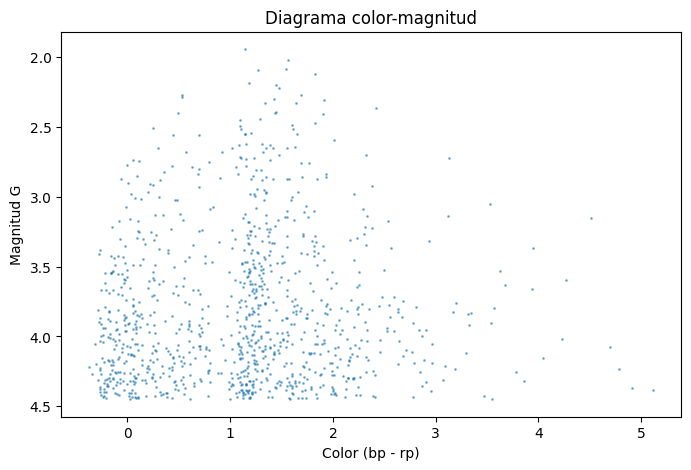

In [ ]:
import matplotlib.pyplot as plt

# Crear diagrama color-magnitud
plt.figure(figsize=(8,5))
plt.scatter(df["bp_rp"], df["phot_g_mean_mag"], s=1, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel("Color (bp - rp)")
plt.ylabel("Magnitud G")
plt.title("Diagrama color-magnitud")
plt.show()

**Preguntas:**
1. ¿Qué patrones observas?
2. ¿Dónde están las estrellas más brillantes y más azules?